In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
import warnings
from google.colab import drive
import seaborn as sns
warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset

cols = ['Post ID', 'Sound Bite Text', 'Title', 'Published Date (GMT-04:00) New York', 'Sentiment']
data = pd.read_excel('Diabetes Continuous Glucose Monitoring – Data Export.xlsx')
data = pd.DataFrame(data,columns=cols)
data.columns = ['postID', 'text', 'title', 'date', 'sentiment']

In [ ]:
# Exploratory data analysis

Thus, there are 37844 rows in the dataset. Not all of them are related to CGMs, which we shall filter later.

In [ ]:
# Length of data
len(data)

37844

In [ ]:
# Shape of data
data.shape

(37844, 4)

In [ ]:
# Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37844 entries, 0 to 37843
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   postID     37844 non-null  object
 1   text       37844 non-null  object
 2   title      36273 non-null  object
 3   sentiment  37844 non-null  object
dtypes: object(4)
memory usage: 1.2+ MB


In [ ]:
# Checking null values
data.isnull().sum()

postID          0
text            0
title        1571
sentiment       0
dtype: int64

In [ ]:
# 1571 rows have empty title.

In [ ]:
data[data['title'].isnull()]

,postID,text,title,sentiment
2,1565738759353602048,i ran out of characters. youtu.be/RWgl2PDhQiM ...,NaN,Positives
3,17944607459251789,MY lunch! Ate at 10:30am \n1 unit NovoLog insu...,NaN,Neutrals
5,17875966583693003,I’d like a new pancreas please ✌?? \n\n#type1d...,NaN,Neutrals
117,1533563828881002502,“…adds continuous glucose monitoring to the Ap...,NaN,Neutrals
134,729100662793856259,I frequently recommend clients to check their ...,NaN,Neutrals
...,...,...,...,...
37790,1565094128807034882,@Mandrews_81 wish you a great season and a sup...,NaN,Neutrals
37807,1565099870788243457,Ran into a very nice young man from Jordan at ...,NaN,Positives
37811,17952676675961184,Happy birthday to my sister that turned 1 year...,NaN,Neutrals
37824,1565388543370870784,@dclynick66 @FreeStyleLibre I’m glad you are d...,NaN,Neutrals


In [ ]:
# Number of unique sentiments
data['sentiment'].nunique()

4

In [ ]:
# Unique sentiment values
data['sentiment'].unique()

array(['Neutrals', 'Positives', 'Mixed', 'Negatives'], dtype=object)

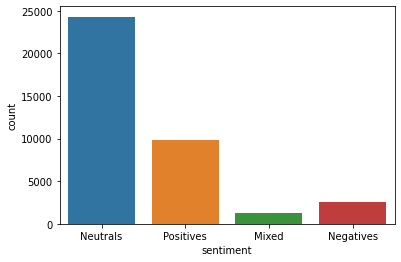

In [ ]:


sns.countplot(x='sentiment', data=data)

In [ ]:
# Converting text and title to lowercase

df = pd.DataFrame()
df = data[['postID', 'text', 'title', 'sentiment']]

df['text']=df['text'].str.lower()
df['title']=df['title'].str.lower()
df.head()

,postID,text,title,sentiment
0,BRDRDT2-t1_imq98sr,my numbers are great now. estimated a1c of 7%i...,have you been denied a second/third pump? feel...,Neutrals
1,BRDRDT2-t1_impbcf4,i tried it for a little while. no side effects...,metformin,Positives
2,1565738759353602048,i ran out of characters. youtu.be/rwgl2pdhqim ...,NaN,Positives
3,17944607459251789,my lunch! ate at 10:30am \n1 unit novolog insu...,NaN,Neutrals
4,BRDRDT2-t1_imq8h9m,this is also because like a soak in a hot tub ...,"no bath salts, bath oils, soaks?",Neutrals


In [ ]:
# Removing stopwords from text and title

import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))

def removing_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords])

df['text'] = df['text'].apply(lambda text: removing_stopwords(text))
df['title'] = df['title'].apply(lambda text: removing_stopwords(text))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,postID,text,title,sentiment
0,BRDRDT2-t1_imq98sr,numbers great now. estimated a1c 7%ish. care s...,denied second/third pump? feeling like messed up.,Neutrals
1,BRDRDT2-t1_impbcf4,tried little while. side effects help insulin ...,metformin,Positives
2,1565738759353602048,ran characters. youtu.be/rwgl2pdhqim i'll also...,nan,Positives
3,17944607459251789,lunch! ate 10:30am 1 unit novolog insulin via ...,nan,Neutrals
4,BRDRDT2-t1_imq8h9m,also like soak hot tub potential exists lowere...,"bath salts, bath oils, soaks?",Neutrals


In [ ]:
# Removing mentions from text

import re

def removing_mentions(text):
    return re.sub('@[A-Za-z0-9_]+','',text)

df['text'] = df['text'].apply(lambda text: removing_mentions(text))
df.head()

,postID,text,title,sentiment
0,BRDRDT2-t1_imq98sr,numbers great now. estimated a1c 7%ish. care s...,denied second/third pump? feeling like messed up.,Neutrals
1,BRDRDT2-t1_impbcf4,tried little while. side effects help insulin ...,metformin,Positives
2,1565738759353602048,ran characters. youtu.be/rwgl2pdhqim i'll also...,nan,Positives
3,17944607459251789,lunch! ate 10:30am 1 unit novolog insulin via ...,nan,Neutrals
4,BRDRDT2-t1_imq8h9m,also like soak hot tub potential exists lowere...,"bath salts, bath oils, soaks?",Neutrals


In [ ]:
# Removing URLs from text
import re

def removing_URLs(text):
    return re.sub(r'http\S+', '', text)

df['text'] = df['text'].apply(lambda text: removing_URLs(text))
df.head()

,postID,text,title,sentiment
0,BRDRDT2-t1_imq98sr,numbers great now. estimated a1c 7%ish. care s...,denied second/third pump? feeling like messed up.,Neutrals
1,BRDRDT2-t1_impbcf4,tried little while. side effects help insulin ...,metformin,Positives
2,1565738759353602048,ran characters. youtu.be/rwgl2pdhqim i'll also...,nan,Positives
3,17944607459251789,lunch! ate 10:30am 1 unit novolog insulin via ...,nan,Neutrals
4,BRDRDT2-t1_imq8h9m,also like soak hot tub potential exists lowere...,"bath salts, bath oils, soaks?",Neutrals


In [ ]:
# Filtering out rows that do not have relevant keywords

relevantkeywords = ['cgm','dexcom','libre','freestyle']
cols = ['text','title']

def checkstringcon(val):
    return (val.str.contains(text).values.any() for text in relevantkeywords)

df = df[df['text'].str.contains('cgm') | df['text'].str.contains('dexcom') | df['text'].str.contains('freestyle') | df['text'].str.contains('libre') | df['title'].str.contains('cgm') |  df['title'].str.contains('dexcom') | df['title'].str.contains('freestyle') | df['title'].str.contains('libre')]
df.head()

NameError: ignored

In [ ]:
# Removing numerical value

def removing_numbers(text):
    return re.sub('[0-9]+', '', text)
df['text'] = df['text'].apply(lambda text: removing_numbers(text))
df['title'] = df['title'].apply(lambda text: removing_numbers(text))
df.head()

,postID,text,title,sentiment
0,BRDRDT2-t1_imq98sr,numbers great now. estimated ac %ish. care say...,denied second/third pump? feeling like messed up.,Neutrals
1,BRDRDT2-t1_impbcf4,tried little while. side effects help insulin ...,metformin,Positives
2,1565738759353602048,ran characters. youtu.be/rwglpdhqim i'll also ...,nan,Positives
3,17944607459251789,lunch! ate :am unit novolog insulin via pump ...,nan,Neutrals
4,BRDRDT2-t1_imq8h9m,also like soak hot tub potential exists lowere...,"bath salts, bath oils, soaks?",Neutrals


In [ ]:
# Removing punctuations

import string

punctuations = string.punctuation

def removing_punctuations(text):
    translator = str.maketrans('', '', punctuations)
    return text.translate(translator)

df['text']= df['text'].apply(lambda text: removing_punctuations(text))
df['title']= df['title'].apply(lambda text: removing_punctuations(text))
df.head()

,postID,text,title,sentiment
0,BRDRDT2-t1_imq98sr,numbers great now estimated ac ish care say wa...,denied secondthird pump feeling like messed up,Neutrals
1,BRDRDT2-t1_impbcf4,tried little while side effects help insulin r...,metformin,Positives
2,1565738759353602048,ran characters youtuberwglpdhqim ill also say ...,nan,Positives
3,17944607459251789,lunch ate am unit novolog insulin via pump gr...,nan,Neutrals
4,BRDRDT2-t1_imq8h9m,also like soak hot tub potential exists lowere...,bath salts bath oils soaks,Neutrals


In [ ]:
# Removing single characters left

def removing_singlechars(text):
    return re.sub('\s+[a-zA-Z]\s+', ' ', text)
df['text'] = df['text'].apply(lambda text: removing_singlechars(text))
df['title'] = df['title'].apply(lambda text: removing_singlechars(text))
df.head()

,postID,text,title,sentiment
0,BRDRDT2-t1_imq98sr,numbers great now estimated ac ish care say wa...,denied secondthird pump feeling like messed up,Neutrals
1,BRDRDT2-t1_impbcf4,tried little while side effects help insulin r...,metformin,Positives
2,1565738759353602048,ran characters youtuberwglpdhqim ill also say ...,nan,Positives
3,17944607459251789,lunch ate am unit novolog insulin via pump gr...,nan,Neutrals
4,BRDRDT2-t1_imq8h9m,also like soak hot tub potential exists lowere...,bath salts bath oils soaks,Neutrals


In [ ]:
# Tokenize posts and part of speech tagging


# nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r"[\w']+")
df['tagged'] = (df['text'].apply(tokenizer.tokenize)).apply(lambda text: nltk.pos_tag(text))
df.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,postID,text,title,sentiment,tagged
0,BRDRDT2-t1_imq98sr,numbers great now estimated ac ish care say wa...,denied secondthird pump feeling like messed up,Neutrals,"[(numbers, NNS), (great, JJ), (now, RB), (esti..."
1,BRDRDT2-t1_impbcf4,tried little while side effects help insulin r...,metformin,Positives,"[(tried, VBN), (little, JJ), (while, IN), (sid..."
2,1565738759353602048,ran characters youtuberwglpdhqim ill also say ...,nan,Positives,"[(ran, NN), (characters, NNS), (youtuberwglpdh..."
3,17944607459251789,lunch ate am unit novolog insulin via pump gr...,nan,Neutrals,"[(lunch, NN), (ate, NN), (am, VBP), (unit, NN)..."
4,BRDRDT2-t1_imq8h9m,also like soak hot tub potential exists lowere...,bath salts bath oils soaks,Neutrals,"[(also, RB), (like, IN), (soak, NN), (hot, JJ)..."


In [ ]:
# Lemmatizing the words

nltk.download('omw-1.4')
nltk.download('wordnet')

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    return ' '.join([lm.lemmatize(word) for word in data.split()])

df['text'] = df['text'].apply(lambda x: lemmatizer_on_text(x))
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


,postID,text,title,sentiment,tagged
0,BRDRDT2-t1_imq98sr,number great now estimated ac ish care say wan...,denied secondthird pump feeling like messed up,Neutrals,"[(numbers, NNS), (great, JJ), (now, RB), (esti..."
1,BRDRDT2-t1_impbcf4,tried little while side effect help insulin re...,metformin,Positives,"[(tried, VBN), (little, JJ), (while, IN), (sid..."
2,1565738759353602048,ran character youtuberwglpdhqim ill also say n...,nan,Positives,"[(ran, NN), (characters, NNS), (youtuberwglpdh..."
3,17944607459251789,lunch ate am unit novolog insulin via pump gri...,nan,Neutrals,"[(lunch, NN), (ate, NN), (am, VBP), (unit, NN)..."
4,BRDRDT2-t1_imq8h9m,also like soak hot tub potential exists lowere...,bath salts bath oils soaks,Neutrals,"[(also, RB), (like, IN), (soak, NN), (hot, JJ)..."


In [ ]:
from textblob import TextBlob

def format_output(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'
    
def predict_sentiment(text):
   return format_output(TextBlob(text).sentiment.polarity)

df['blob_prediction'] = df['text'].apply(predict_sentiment)
df.head()

,postID,text,title,sentiment,tagged,blob_prediction
0,BRDRDT2-t1_imq98sr,number great now estimated ac ish care say wan...,denied secondthird pump feeling like messed up,Neutrals,"[(numbers, NNS), (great, JJ), (now, RB), (esti...",positive
1,BRDRDT2-t1_impbcf4,tried little while side effect help insulin re...,metformin,Positives,"[(tried, VBN), (little, JJ), (while, IN), (sid...",positive
2,1565738759353602048,ran character youtuberwglpdhqim ill also say n...,nan,Positives,"[(ran, NN), (characters, NNS), (youtuberwglpdh...",negative
3,17944607459251789,lunch ate am unit novolog insulin via pump gri...,nan,Neutrals,"[(lunch, NN), (ate, NN), (am, VBP), (unit, NN)...",negative
4,BRDRDT2-t1_imq8h9m,also like soak hot tub potential exists lowere...,bath salts bath oils soaks,Neutrals,"[(also, RB), (like, IN), (soak, NN), (hot, JJ)...",positive


In [ ]:
#!pip install nltk
#import nltk
# Download the lexicon
nltk.download("vader_lexicon")

# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

def format_output(output_dict): 
  polarity = "neutral"
  if(output_dict['compound']>= 0.05):
    polarity = "positive"
  elif(output_dict['compound']<= -0.05):
    polarity = "negative"
  return polarity

def predict_sentiment(text): 
  output_dict =  sent_analyzer.polarity_scores(text)
  return format_output(output_dict)

# Run the predictions
df["vader_prediction"] = df["text"].apply(predict_sentiment)
df.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,postID,text,title,sentiment,tagged,blob_prediction,vader_prediction
0,BRDRDT2-t1_imq98sr,number great now estimated ac ish care say wan...,denied secondthird pump feeling like messed up,Neutrals,"[(numbers, NNS), (great, JJ), (now, RB), (esti...",positive,positive
1,BRDRDT2-t1_impbcf4,tried little while side effect help insulin re...,metformin,Positives,"[(tried, VBN), (little, JJ), (while, IN), (sid...",positive,positive
2,1565738759353602048,ran character youtuberwglpdhqim ill also say n...,nan,Positives,"[(ran, NN), (characters, NNS), (youtuberwglpdh...",negative,negative
3,17944607459251789,lunch ate am unit novolog insulin via pump gri...,nan,Neutrals,"[(lunch, NN), (ate, NN), (am, VBP), (unit, NN)...",negative,positive
4,BRDRDT2-t1_imq8h9m,also like soak hot tub potential exists lowere...,bath salts bath oils soaks,Neutrals,"[(also, RB), (like, IN), (soak, NN), (hot, JJ)...",positive,negative


In [ ]:
# nltk.download('brown')
# nltk.download('punkt')

def get_phrases(text):
    return TextBlob(text).noun_phrases
 
df['phrases'] = df['text'].apply(get_phrases)
df.head()

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,postID,text,title,sentiment,tagged,blob_prediction,vader_prediction,phrases
0,BRDRDT2-t1_imq98sr,number great now estimated ac ish care say wan...,denied secondthird pump feeling like messed up,Neutrals,"[(numbers, NNS), (great, JJ), (now, RB), (esti...",positive,positive,"[ac ish care, actual lab look dexcom stuff]"
1,BRDRDT2-t1_impbcf4,tried little while side effect help insulin re...,metformin,Positives,"[(tried, VBN), (little, JJ), (while, IN), (sid...",positive,positive,"[side effect, insulin resistance, tandom dexcom]"
2,1565738759353602048,ran character youtuberwglpdhqim ill also say n...,nan,Positives,"[(ran, NN), (characters, NNS), (youtuberwglpdh...",negative,negative,"[character youtuberwglpdhqim, etc im, resource..."
3,17944607459251789,lunch ate am unit novolog insulin via pump gri...,nan,Neutrals,"[(lunch, NN), (ate, NN), (am, VBP), (unit, NN)...",negative,positive,"[lunch ate, unit novolog insulin, chicken feta..."
4,BRDRDT2-t1_imq8h9m,also like soak hot tub potential exists lowere...,bath salts bath oils soaks,Neutrals,"[(also, RB), (like, IN), (soak, NN), (hot, JJ)...",positive,negative,"[hot tub potential exists, blood sugar doctor,..."


In [ ]:
#Extracting dexcom related data
dexcom_data = pd.DataFrame()
dexcom_data = df[df['text'].str.contains('dexcom') | df['title'].str.contains('dexcom')]
dexcom_data.head()

,postID,text,title,sentiment,tagged,blob_prediction,vader_prediction,phrases
0,BRDRDT2-t1_imq98sr,number great now estimated ac ish care say wan...,denied secondthird pump feeling like messed up,Neutrals,"[(numbers, NNS), (great, JJ), (now, RB), (esti...",positive,positive,"[ac ish care, actual lab look dexcom stuff]"
1,BRDRDT2-t1_impbcf4,tried little while side effect help insulin re...,metformin,Positives,"[(tried, VBN), (little, JJ), (while, IN), (sid...",positive,positive,"[side effect, insulin resistance, tandom dexcom]"
2,1565738759353602048,ran character youtuberwglpdhqim ill also say n...,nan,Positives,"[(ran, NN), (characters, NNS), (youtuberwglpdh...",negative,negative,"[character youtuberwglpdhqim, etc im, resource..."
3,17944607459251789,lunch ate am unit novolog insulin via pump gri...,nan,Neutrals,"[(lunch, NN), (ate, NN), (am, VBP), (unit, NN)...",negative,positive,"[lunch ate, unit novolog insulin, chicken feta..."
5,17875966583693003,i’d like new pancreas please ✌ typediabetes de...,nan,Neutrals,"[(i, JJ), (d, VBP), (like, IN), (new, JJ), (pa...",positive,positive,"[i ’ d, new pancreas, ✌ typediabetes dexcomg d..."


In [ ]:
#Extracting Freestyle Libre related data

freestylelibre_data = pd.DataFrame()
freestylelibre_data = df[df['text'].str.contains('freestyle') | df['text'].str.contains('libre') | df['title'].str.contains('freestyle') | df['title'].str.contains('libre')]
freestylelibre_data.head()

,postID,text,title,sentiment,tagged,blob_prediction,vader_prediction,phrases
7,BRDRDT2-t1_imrqfpz,currently impatiently waiting told canada get ...,libre,Mixed,"[(currently, RB), (impatiently, RB), (waiting,...",positive,positive,"[’ s, accurate i ’ ve, dexcom past issue, libr..."
10,BRDRDT2-t1_imrg3eh,ive tried get without doctor prescription expe...,need help prediabetes diet family member diagn...,Neutrals,"[(ive, JJ), (tried, VBD), (get, NN), (without,...",negative,negative,"[doctor prescription, expensive hell, cheap eu..."
18,BRDRDT2-t3_x3k69s,month fighting insurance pharmacy move libre d...,finally going dexcom,Neutrals,"[(months, NNS), (fighting, VBG), (insurance, N...",positive,positive,"[insurance pharmacy, libre dexcom i ’ m, ’ t, ..."
23,BRDRDT2-t1_imspl4k,hey man welcome club nobody want join highly h...,newley diagnosed type,Neutrals,"[(hey, NN), (man, NN), (welcome, JJ), (club, N...",positive,positive,"[hey man, dx ’ d, ’ s diabetic bible introduce..."
31,BRDRDT2-t1_imsv1ll,adhd really worried sensor would constant phys...,sensor questionslooking advice,Neutrals,"[(adhd, NNS), (really, RB), (worried, JJ), (se...",negative,negative,"[constant physical annoyance, freestyle libre,..."


In [ ]:
# Praises of Dexcom

dexcom_praises = []
dexcom_praises = dexcom_data[dexcom_data['vader_prediction'] == 'positive']['text']
print('---------Praises of Dexcom-------')
dexcom_praises

---------Praises of Dexcom-------


0        number great now estimated ac ish care say wan...
1        tried little while side effect help insulin re...
3        lunch ate am unit novolog insulin via pump gri...
5        i’d like new pancreas please ✌ typediabetes de...
7        currently impatiently waiting told canada get ...
                               ...                        
37825                               yes dexcom look others
37828    noted reply first reply dx’d want make availab...
37829    used mix humulin novolin insulin take min eati...
37832    interested hear others experience kind vent in...
37834    accurate dexcom first hour real pain especiall...
Name: text, Length: 13003, dtype: object

In [ ]:
# Complaints about Dexcom

dexcom_complaints = []
dexcom_complaints = dexcom_data[dexcom_data['vader_prediction'] == 'negative']['text']
print('---------Complaints about Dexcom-------')
dexcom_complaints

---------Complaints about Dexcom-------


2        ran character youtuberwglpdhqim ill also say n...
9        i’m tslim pump dexcom usually number today the...
24       exactly issue recently switch all permission b...
25       got dexcom definitely helping lot showing fast...
28       diabetes year think highest fell asleep early ...
                               ...                        
37822    look can’t expect modify answer reading respon...
37835    got switched libre well it’s inconsistent comp...
37836    same around day lately dexcom act weird random...
37838    guess mine would attributing light headedness ...
37840    my mom learned inject year old self orange per...
Name: text, Length: 5188, dtype: object

In [ ]:
# Praises of Freestyle Libre
from collections import Counter

freestylelibre_praises = []
freestylelibre_praises = freestylelibre_data[freestylelibre_data['vader_prediction'] == 'positive']['text']
print('---------Praises of Freestyle Libre-------')
print(freestylelibre_praises)

#Counter(freestylelibre_praises).most_common(10)

---------Praises of Freestyle Libre-------
7        currently impatiently waiting told canada get ...
18       month fighting insurance pharmacy move libre d...
23       hey man welcome club nobody want join highly h...
37                  freestyle libre day sensor libre thing
45       asked cgm get majority said dexcom best unfort...
                               ...                        
37809    that’s weird freestyle libre older omnipod pum...
37811    happy birthday sister turned year today good s...
37814    liked libre lot it went dexcom proactive alert...
37830    type manage glucose level using freestyle libr...
37841    spoke rep abbott rep told yet plan update free...
Name: text, Length: 5427, dtype: object


In [ ]:
# Complaints about Freestyle Libre

freestylelibre_complaints = []
freestylelibre_complaints = freestylelibre_data[freestylelibre_data['vader_prediction'] == 'negative']['text']
print('---------Complaints about Freestyle Libre-------')
freestylelibre_complaints

---------Complaints about Freestyle Libre-------


10       ive tried get without doctor prescription expe...
31       adhd really worried sensor would constant phys...
36       use dexcom libre wife put mine back shoulder b...
95       turn completely curious come canada biggest fa...
97       cgm mdi feel right too loved libre developed n...
                               ...                        
37761    well unfortunately dexcom isn’t available shit...
37768    hello bought continuous glucose monitor freest...
37804    surprised could actually use libre sensor trie...
37806    chance are cant certify prerelease wait releas...
37835    got switched libre well it’s inconsistent comp...
Name: text, Length: 1573, dtype: object

In [ ]:
#Phrases talked about
print('Dexcom:: Features talked about')
print(dexcom_data['phrases'])
print('Freestyle Libre:: Features talked about')
print(freestylelibre_data['phrases'])

Dexcom:: Features talked about
0              [ac ish care, actual lab look dexcom stuff]
1         [side effect, insulin resistance, tandom dexcom]
2        [character youtuberwglpdhqim, etc im, resource...
3        [lunch ate, unit novolog insulin, chicken feta...
5        [i ’ d, new pancreas, ✌ typediabetes dexcomg d...
                               ...                        
37835    [’ s inconsistent, i ’ d, ’ re, able company, ...
37836           [dexcom act weird random spike drop point]
37837                                                   []
37838    [guess mine, light headedness, low bg course c...
37840    [old self, nurse time, human skin lol work, de...
Name: phrases, Length: 20369, dtype: object
Freestyle Libre:: Features talked about
7        [’ s, accurate i ’ ve, dexcom past issue, libr...
10       [doctor prescription, expensive hell, cheap eu...
18       [insurance pharmacy, libre dexcom i ’ m, ’ t, ...
23       [hey man, dx ’ d, ’ s diabetic bible introduce...


In [ ]:
# 2.b product features being talked about

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=100, token_pattern='\w+|\$[\d\.]+|\S+')
# apply transformation
tf = vectorizer.fit_transform(df['text']) #.toarray()
# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()
tf.shape # --> (200000, 2296)

(36163, 1652)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
number_of_topics = 10
model = LatentDirichletAllocation(n_components=number_of_topics, random_state=45) # random state for reproducibility
# Fit data to model
model.fit(tf)

LatentDirichletAllocation(random_state=45)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

no_top_words = 10
print('Product features talked about:: ')
display_topics(model, tf_feature_names, no_top_words)

Product features talked about:: 


,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,cgm,4274.4,insurance,3969.5,cgm,4753.0,sugar,3442.8,glucose,6849.0,sensor,4418.0,dexcom,5003.9,libre,7866.2,i,11584.6,pump,5719.1
1,im,3740.7,supply,1982.1,year,4025.8,low,3085.7,blood,5098.9,dexcom,4214.3,app,3538.3,freestyle,4930.5,’t,9210.3,dexcom,4538.2
2,like,2887.2,insulin,1750.4,pump,2969.9,blood,2639.6,cgm,3821.9,day,2634.1,phone,3139.2,dexcom,2380.7,’s,8090.4,medtronic,2492.0
3,low,2715.2,get,1702.7,ac,2655.1,cgm,2618.7,sugar,3491.5,one,1641.5,use,1978.8,sensor,2360.4,’m,6270.9,tandem,2127.4
4,get,2362.5,cgm,1595.5,got,2067.8,insulin,2608.5,monitor,3026.4,time,1641.3,watch,1568.0,finger,2246.0,it,5642.5,omnipod,1943.4
5,know,1787.7,dexcom,1524.1,insulin,1951.5,high,1978.2,diabetes,2970.9,new,1268.5,arm,1534.6,reading,1626.4,’ve,3996.0,tslim,1938.2
6,dexcom,1743.6,month,1509.3,diabetes,1883.5,day,1838.7,level,2492.9,transmitter,1234.7,work,1156.3,day,1298.5,don,3081.0,cgm,1805.6
7,feel,1691.4,cover,1482.9,get,1796.8,time,1618.1,continuous,2418.1,pump,1159.6,using,759.1,stick,996.2,dexcom,2431.3,year,1451.8
8,time,1529.5,pay,1365.3,time,1794.7,hour,1597.3,insulin,1342.2,site,1110.8,apple,732.2,accurate,953.2,cgm,1637.8,im,1278.4
9,would,1483.2,cost,1242.4,life,1690.4,eat,1552.7,type,1277.7,ive,1103.9,also,724.9,use,863.8,you,1522.2,system,1266.5


In [ ]:
# -----------------------------

In [ ]:
df.head()

,postID,text,title,sentiment,tagged,blob_prediction,vader_prediction,phrases
0,BRDRDT2-t1_imq98sr,number great now estimated ac ish care say wan...,denied secondthird pump feeling like messed up,Neutrals,"[(numbers, NNS), (great, JJ), (now, RB), (esti...",positive,positive,"[ac ish care, actual lab look dexcom stuff]"
1,BRDRDT2-t1_impbcf4,tried little while side effect help insulin re...,metformin,Positives,"[(tried, VBN), (little, JJ), (while, IN), (sid...",positive,positive,"[side effect, insulin resistance, tandom dexcom]"
2,1565738759353602048,ran character youtuberwglpdhqim ill also say n...,nan,Positives,"[(ran, NN), (characters, NNS), (youtuberwglpdh...",negative,negative,"[character youtuberwglpdhqim, etc im, resource..."
3,17944607459251789,lunch ate am unit novolog insulin via pump gri...,nan,Neutrals,"[(lunch, NN), (ate, NN), (am, VBP), (unit, NN)...",negative,positive,"[lunch ate, unit novolog insulin, chicken feta..."
4,BRDRDT2-t1_imq8h9m,also like soak hot tub potential exists lowere...,bath salts bath oils soaks,Neutrals,"[(also, RB), (like, IN), (soak, NN), (hot, JJ)...",positive,negative,"[hot tub potential exists, blood sugar doctor,..."


In [ ]:
# predict sentiment for the title
df["title_vader_prediction"] = df["title"].apply(predict_sentiment)
df.head()

NameError: ignored

In [ ]:
# finding common phrases of 3/4/5 words using ngrams
from nltk import ngrams

title_negative_sentiment=df[df['title_vader_prediction']=='negative']
vals = [y for x in title_negative_sentiment['title'] for y in x.split()]


n = [3,4,5]
# to show unmet demands- output needs to be finetuned
neg= pd.Series([' '.join(y) for x in n for y in ngrams(vals, x)]).value_counts()
print (neg)


title_positive_sentiment=df[df['title_vader_prediction']=='positive']
vals2 = [y for x in title_positive_sentiment['title'] for y in x.split()]


pos= pd.Series([' '.join(y) for x in n for y in ngrams(vals2, x)]).value_counts()
print (pos)

